In [54]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix

In [166]:
file_path = "data/sorted.json"

In [167]:
    with open(file_path, "r", encoding="utf-8") as file:
        data = [json.loads(line) for line in file]

In [168]:
    df = pd.DataFrame(data)

In [169]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/rei-workers-ber...,REI Workers At Berkeley Store Vote To Unionize...,BUSINESS,They follow in the footsteps of REI workers in...,Dave Jamieson,2022-08-25
1,https://www.huffpost.com/entry/twitter-elon-mu...,Twitter Lawyer Calls Elon Musk 'Committed Enem...,BUSINESS,Delaware Chancery Judge Kathaleen McCormick de...,Marita Vlachou,2022-07-20
2,https://www.huffpost.com/entry/starbucks-leave...,"Starbucks Leaving Russian Market, Shutting 130...",BUSINESS,Starbucks' move follows McDonald's exit from t...,"DEE-ANN DURBIN, AP",2022-05-23
3,https://www.huffpost.com/entry/coinbase-crypto...,Crypto Crash Leaves Trading Platform Coinbase ...,BUSINESS,Cryptocurrency trading platform Coinbase has l...,"Matt Ott, AP",2022-05-12
4,https://www.huffpost.com/entry/us-april-jobs-r...,"US Added 428,000 Jobs In April Despite Surging...",BUSINESS,"At 3.6%, unemployment nearly reached the lowes...","Paul Wiseman, AP",2022-05-06


In [170]:
filtered_columns = {"short_description", "category"}

In [171]:
df.rename(columns={"short_description": "text"}, inplace=True)
# Drop any rows with missing values in required columns
df.dropna(subset=["text", "category"], inplace=True)

# Ensure categorical labels are valid and non-empty
df = df[df["category"].str.strip() != ""]

In [172]:
df.head()

,link,headline,category,text,authors,date
0,https://www.huffpost.com/entry/rei-workers-ber...,REI Workers At Berkeley Store Vote To Unionize...,BUSINESS,They follow in the footsteps of REI workers in...,Dave Jamieson,2022-08-25
1,https://www.huffpost.com/entry/twitter-elon-mu...,Twitter Lawyer Calls Elon Musk 'Committed Enem...,BUSINESS,Delaware Chancery Judge Kathaleen McCormick de...,Marita Vlachou,2022-07-20
2,https://www.huffpost.com/entry/starbucks-leave...,"Starbucks Leaving Russian Market, Shutting 130...",BUSINESS,Starbucks' move follows McDonald's exit from t...,"DEE-ANN DURBIN, AP",2022-05-23
3,https://www.huffpost.com/entry/coinbase-crypto...,Crypto Crash Leaves Trading Platform Coinbase ...,BUSINESS,Cryptocurrency trading platform Coinbase has l...,"Matt Ott, AP",2022-05-12
4,https://www.huffpost.com/entry/us-april-jobs-r...,"US Added 428,000 Jobs In April Despite Surging...",BUSINESS,"At 3.6%, unemployment nearly reached the lowes...","Paul Wiseman, AP",2022-05-06


In [173]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["category"], test_size=0.2, random_state=42)

# Ensure sample sizes match
assert len(X_train) == len(y_train), "Mismatch in training data samples"
assert len(X_test) == len(y_test), "Mismatch in testing data samples"

In [174]:
# Build text classification pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [175]:
 # Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [176]:
  # Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
accuracy

0.6719289590527874

In [177]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.6615886629580006

In [178]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

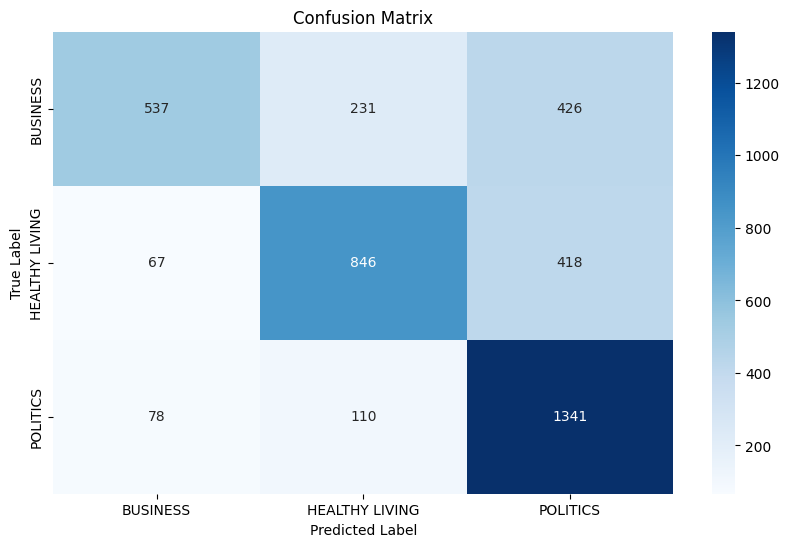

In [179]:
# Plot Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

/var/folders/q0/qpfj4kkj3rz38z68cptd702c0000gn/T/ipykernel_99483/1680255829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="viridis")


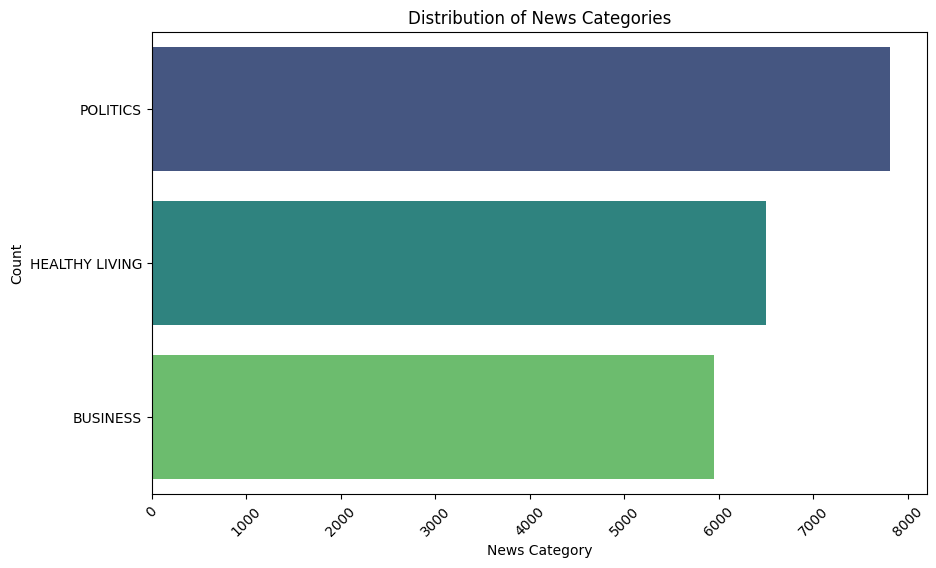

In [180]:
# Plot Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("News Category")
plt.ylabel("Count")
plt.title("Distribution of News Categories")
plt.show()

In [185]:
def predict_category(text):
    prediction = model.predict([text])
    return prediction

sample_text = "Three months into 2025, US measles cases surpass total for 2024"
predicted_category = predict_category(sample_text)
predicted_category

array(['HEALTHY LIVING'], dtype='<U14')